In [612]:
"""
This program offers the following options:
1. Randomly generate sale records
2. Load in sales data (reading from a CSV or database).
3. Retrieve the latest sale
4. Compute the total revenue
5. Check for duplicate sale IDs 
6. Search for a sale by its ID

A sale record contains:
1. A unique sale ID.
2. A sale date.
3. The amount of the sale.
4. The product name sold.
"""

'\nThis program offers the following options:\n1. Randomly generate sale records\n2. Load in sales data (reading from a CSV or database).\n3. Retrieve the latest sale\n4. Compute the total revenue\n5. Check for duplicate sale IDs \n6. Search for a sale by its ID\n\nA sale record contains:\n1. A unique sale ID.\n2. A sale date.\n3. The amount of the sale.\n4. The product name sold.\n'

In [613]:
import jdc
import csv
import random
import os.path

In [614]:
from faker import Faker
def generate_test_data(records=10):
    fake = Faker()
    with open(Sales.DATA_FILE, 'w', newline='') as f:
        writer = csv.writer(f)
        writer.writerow(Sales.COLS.values())
        for i in range(records):
            # generating random sale records
            row = []
            row.append(fake.random_int(min=0, max=records-1))
            row.append(fake.date_between(start_date="-1y", end_date="today").strftime("%Y-%m-%d"))
            row.append(round(random.uniform(10, 500), 2))
            row.append(random.choice(Sales.PRODUCTS))
            writer.writerow(row)
    f.close()

In [615]:
def find_dups(my_list):
# Find duplicate elements
# log start and end indices when found
# from a sorted list
    dups = {}
    first = 0 # index of an element first seen
    last = 0 # index of an element last seen
    l = 0
    while first < len(my_list)-1:
        r = len(my_list) - 1
        target = my_list[l]
        while r > l: # searching for the index of the target's last occurrence
            m = (l+r+1)//2
            if my_list[m] == target: # middle element = target
                # need to check the half right to middle index
                l = m + 1
                last = m
            else: # middle element > target
                # need to check the half left to middle index
                r = m - 1
        if my_list[r] == target:
            last = r
        if last != first: # duplicates found
            # save the indices of first and last occurrences of the target
            dups[target] = (first, last)
        l = first = last + 1
    return dups

In [616]:
def binary_search(my_list, num):
    l = 0
    r = len(my_list) - 1
    while r >= l:
        m = (l+r+1)//2
        if my_list[m] == num: # found
            return m
        if my_list[m] < num: # middle element < target
            # need to check the half right to middle index
            l = m + 1
        else: # middle element > target
            # need to check the half left to middle index
            r = m - 1
    return None

In [617]:
class Sales:
    DATA_FILE = 'sales_records.csv' # the default file to r/w test sale data to/from
    PRODUCTS = ["Widget", "Gadget", "Thingamajig", "Doohickey"]
    COL_SALE_ID = 0
    COL_SALE_DATE = 1
    COL_AMT = 2
    COL_PROD = 3
    COLS = {COL_SALE_ID: "sale_id", COL_SALE_DATE: "sale_date", COL_AMT: "amount", COL_PROD: "product"} # col headers
    def __init__(self):
        self.data = None
        self.dup_ids = {}

In [618]:
%%add_to Sales
def load_data(self, fname = Sales.DATA_FILE):
    # load data from the default file or the file specified by user
    try:
        with open(fname, 'r') as f:
            reader = csv.reader(f)
            next(reader)
            # populate Sales.data upon loading from csv
            self.data = list(reader)
            for row in self.data:
                row[0] = int(row[0])
            self.data.sort(key = lambda x: x[0])
        f.close()
    except Exception as e:
        print(f"File open error: {str(e)}")
        return
    # transpose the sales data 2D array to a list of lists of columns instaed of list of sales
    transposed = list(zip(*self.data))
    # find all ID's that have duplicates
    self.dup_ids = find_dups(transposed[Sales.COL_SALE_ID])

In [619]:
%%add_to Sales
def get_latest_sale(self):
    # transpose the sales data 2D array to a list of lists of columns instaed of list of sales
    transposed = list(zip(*self.data))
    # list of all sale dates
    sale_dates = transposed[Sales.COL_SALE_DATE]
    date_latest = max(sale_dates)
    # return a list of indices of sales matching the latest date
    return [idx for idx, date in enumerate(sale_dates) if date == date_latest]

In [620]:
%%add_to Sales
def get_total_rev(self):
    # transpose the sales data 2D array to a list of lists of columns instaed of list of sales
    transposed = list(zip(*self.data))
    # list of amounts
    amounts = [float(x) for x in transposed[Sales.COL_AMT]]
    # return sum of amounts
    return sum(amounts)

In [621]:
%%add_to Sales
def check_dup_id(self):
    if self.dup_ids:
        return [*self.dup_ids.keys()]
    else:
        return None

In [622]:
%%add_to Sales
def search_by_id(self, sale_id):
    # return list of sales with matching sale id
    if sale_id in self.dup_ids: # if sale_id has duplicates
        return [sale for sale in self.data[self.dup_ids[sale_id][0]:self.dup_ids[sale_id][1]+1]]
    # transpose the sales data 2D array to a list of lists of columns instaed of list of sales
    transposed = list(zip(*self.data))
    # use binary search to find a match
    idx = binary_search(transposed[Sales.COL_SALE_ID], sale_id)
    if idx == None:
        return []
    else:
        return([self.data[idx]])

In [623]:
def menu(sales):
    while True:
        try:
            opt = int(input(" \
            1. Generate test sales data\n \
            2. Load sales data\n \
            3. Retrieve the latest sale\n \
            4. Compute the total revenue\n \
            5. Check for duplicate sale IDs\n \
            6. Search for a sale by its ID\n \
            7. Exit\n \
            Enter your choice: "))
        except:
            print("Please enter a number\n")
            continue
        if opt == 1:
            try:
                rec = int(input("How many records (default = 10): "))
                if rec:
                    generate_test_data(rec)
                print(f"Test sales data generated and saved in {Sales.DATA_FILE}")
            except:
                print("An exception occurred")
        elif opt == 2:
            fname = input(f"Sales data file (default = {Sales.DATA_FILE}): ")
            if fname:
                sales.load_data(fname)
            else:
                sales.load_data()
            try:
                if sales.data == None:
                    print("Sales data not loaded")
                else:
                    print(f"Sales data loaded")
            except:
                pass
        elif opt == 3:
            if sales.data is None:
                print("Load sales data first\n")
                continue
            idx_latest_sales = sales.get_latest_sale()
            for i in idx_latest_sales:
                print(sales.data[i])
        elif opt == 4:
            if sales.data is None:
                print("Load sales data first\n")
                continue
            print(sales.get_total_rev())
        elif opt == 5:
            if sales.data is None:
                print("Load sales data first\n")
                continue
            dups = sales.check_dup_id()
            if dups:
                print(dups)
            else:
                print("No duplicate sale ID")
        elif opt == 6:
            if sales.data is None:
                print("Load sales data first\n")
                continue
            sale_id = int(input("Enter sale id: "))
            records = sales.search_by_id(sale_id)
            if records:
                for record in records:
                    print(record)
            else:
                print("Sale ID not found")
        else:
            break
        print('\n')

In [624]:
import timeit
from tabulate import tabulate
import matplotlib.pyplot as plt
def time_comp_analysis(sales):
    iterations = 100
    num_sales = [100, 1000, 10000, 100000]
#    num_sales = [100, 500, 2500, 12500, 62500]
    time_load_data = {}
    time_get_latest_sale = {}
    time_get_total_rev = {}
    time_check_dup_id = {}
    time_search_by_id = {}
    for n in num_sales:
        generate_test_data(n)
        time_load_data[n] = round(timeit.timeit(lambda: sales.load_data(), number=iterations)*1000, 2)
        time_get_latest_sale[n] = round(timeit.timeit(lambda: sales.get_latest_sale(), number=iterations)*1000, 2)
        time_get_total_rev[n] = round(timeit.timeit(lambda: sales.get_total_rev(), number=iterations)*1000, 2)
        time_check_dup_id[n] = round(timeit.timeit(lambda: sales.check_dup_id(), number=iterations)*1000, 2)
        time_search_by_id[n] = round(timeit.timeit(lambda: sales.search_by_id(n//2+1), number=iterations)*1000, 2)
    print('Execution Time in ms')
    print(tabulate([['load_data']+[*time_load_data.values()], ['get_latest_sale']+[*time_get_latest_sale.values()], \
                   ['get_total_rev']+[*time_get_total_rev.values()], ['check_dup_id']+[*time_check_dup_id.values()], \
                   ['search_by_id']+[*time_search_by_id.values()]], headers=['operations']+[*time_load_data]))
    print('\n')
    plt.plot([*time_load_data], [*time_load_data.values()], label='load_data', marker = 'o')
    plt.plot([*time_load_data], [*time_get_latest_sale.values()], label='get_latest_sale', marker = 'o')
    plt.plot([*time_load_data], [*time_get_total_rev.values()], label='get_total_rev', marker = 'o')
    plt.plot([*time_load_data], [*time_check_dup_id.values()], label='check_dup_id', marker = 'o')
    plt.plot([*time_load_data], [*time_search_by_id.values()], label='search_by_id', marker = 'o')
    plt.grid()
    plt.legend(['load_data', 'get_latest_sale', 'get_total_rev', 'check_dup_id', 'search_by_id'])
    plt.xlabel('Number of Sales')
    plt.ylabel('Time Taken (ms)')
    plt.show()

Execution Time in ms
operations          100     1000     10000     100000
---------------  ------  -------  --------  ---------
load_data        732.73  1487.26  10266.4   116002
get_latest_sale    3.61    39.81   1124.72   16739.6
get_total_rev      5.96    69.73   1509.32   16272
check_dup_id       0.12     0.44      4.99      54.71
search_by_id       0.15    19.53      0.3        0.17




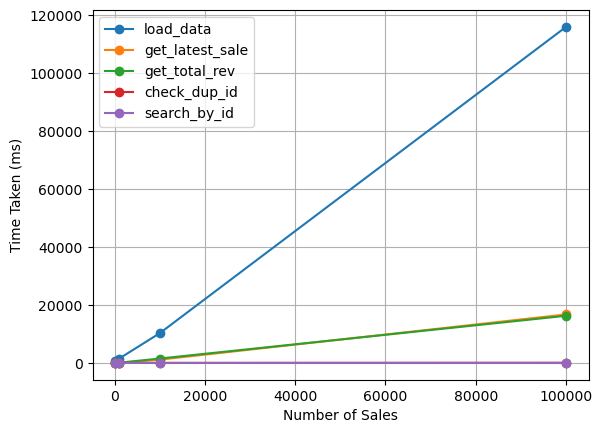

In [625]:
sales = Sales()
#menu(sales)
time_comp_analysis(sales)

## Reflection
### - Performance Trends:

Big O Complexity
|  load_data  |  get_latest_sale  |  get_total_rev  |  check_dup_id  |  search_by_id  |
|:---:|:---:|:---:|:---:|:---:|
| O(nlogn) | O(n) | O(n) | O(k) | O(n) |

n: number of sales<br>
k: number of sale ID's that have duplicates<br><br>
__load_data__: The execuation time grows faster as dataset grows. Results are better aligned with the theoretical big O expections as dataset grows.<br>
__get_latest_sale__: The execuation time grows faster as dataset grows. Results are better aligned with the theoretical big O expections with smaller dataset.<br>
__get_total_rev__: The execuation time grows faster as dataset grows. Results are better aligned with the theoretical big O expections with smaller dataset.<br>
__check_dup_id__: The execuation time grows faster as dataset grows.<br>
__search_by_id__: The execuation time grows faster as dataset grows. Results appear haphazard and don't align with the theoretical big O expections.

### - Real-World Implications:

The matrix transpose operation might become bottlenecks in a production system processing millions of records.
Maybe using libraries such as ```pandas``` to transpose can improve the efficiency?
### - Practical Adjustments:

#### Unit Testing:
__load_data__:<br>
1. file name exsits<br>
2. file name doesn't exist<br>
3. no file name provded<br>

__get_latest_sale__:<br>
1. sale.data has been loaded<br>
2. Correct latest date<br>
3. One single sale has the latest date<br>
4. Multiple sales have the latest date<br>

__get_total_rev__:<br>
1. sale.data has been loaded<br>
2. Correct total revenue<br>

__check_dup_id__:<br>
1. sale.data has been loaded<br>
2. No duplicate ID<br>
3. One single duplicate ID<br>
4. Multiple duplicate ID<br>

__search_by_id__:<br>
1. sale.data has been loaded<br>
2. ID doesn't exist<br>
3. ID has one single match<br>
4. ID has multiple matches
#### Error Handling:
1. Error out if file given is not cvs format
#### Data Validation:
1. Data in the ID column is integer<br>
2. Data in the sale date column is date<br>
3. Data in the amount column is float<br>
4. Data in the product name column is not empty